# TRAFFIC SIGNS RECOGNITION PROJECT

PYTHON PROJECT ON TRAFFIC SIGNS RECOGNITION WITH 95% OF ACCURACY USING CNN AND KERAS

# 1. Explore the dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [6]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# 2. Build a CNN model

WE BUILD CNN MODEL TO CLASSIFY THE IMAGES INTO THEIR RESPECTIVE CATEGORIES

In [8]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [9]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Train and Validate the model

AFTER BUILDING THE MODEL,WE TRAIN THE MODEL USING MODEL.FIT()

In [10]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 79s 3ms/step - loss: 2.2775 - accuracy: 0.4403 - val_loss: 0.7178 - val_accuracy: 0.8262
Epoch 2/15
31367/31367 [==============================] - 82s 3ms/step - loss: 0.7939 - accuracy: 0.7718 - val_loss: 0.3583 - val_accuracy: 0.9016
Epoch 3/15
31367/31367 [==============================] - 82s 3ms/step - loss: 0.5269 - accuracy: 0.8452 - val_loss: 0.2265 - val_accuracy: 0.9434
Epoch 4/15
31367/31367 [==============================] - 82s 3ms/step - loss: 0.4258 - accuracy: 0.8751 - val_loss: 0.2211 - val_accuracy: 0.9419
Epoch 5/15
31367/31367 [==============================] - 93s 3ms/step - loss: 0.3480 - accuracy: 0.8970 - val_loss: 0.1302 - val_accuracy: 0.9629
Epoch 6/15
31367/31367 [==============================] - 97s 3ms/step - loss: 0.3107 - accuracy: 0.9064 - val_loss: 0.1031 - val_accuracy: 0.9740
Epoch 7/15
31367/31367 [==============================] - 98s 3ms/ste

FINALLY THE MODEL GOT 95% ACCURACY ON TRAINING DATASET 

# 4. Plot the Graph for Accuracy and Loss

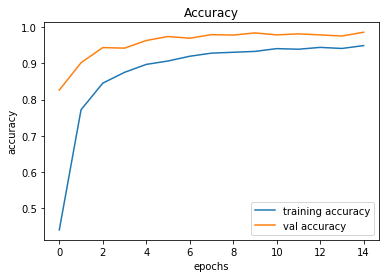

In [11]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

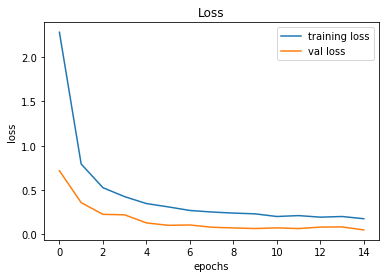

In [12]:
#plotting graphs for loss 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

USING MATPLOTLIB, WE PLOTTED THE GRAPH FOR ACCURACY AND LOSS

# 4. Test our model with test dataset

In [13]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('F:/projects/Traffic signs/Test.csv')

In [14]:
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [15]:
data=[]

In [16]:
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

In [17]:
X_test=np.array(data)

In [18]:
pred = model.predict_classes(X_test)

In [19]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9559778305621536


SAVE THE MODEL USING KERAS MODEL.SAVE() FUNCTION

In [20]:
model.save("traffic_signs.h5")